# Advanced Control Labor 

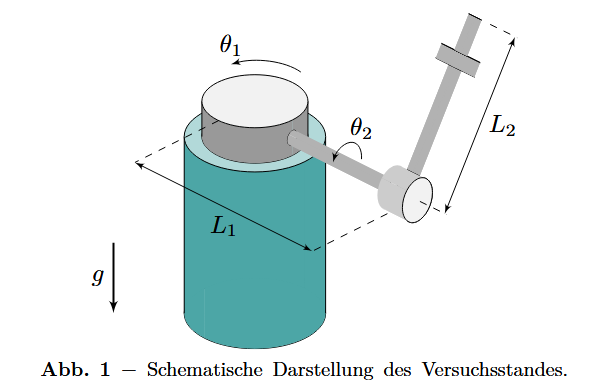

In [1]:
from IPython.display import Image
Image("img/Versuchsaufbau.png")

## 

# Nichtlineares Zustandsraummodell des Furuta-Pendels über den Ansatz des Lösen des linearen Gleichungssystems

## Zustandsraummodel

Zunächst wird der Zustand wie folgt festgelegt. 
$
x(t) =
\begin{pmatrix}
x_1(t) \\
x_2(t) \\
x_3(t) \\
x_4(t)
\end{pmatrix}
=
\begin{pmatrix}
\theta_1(t) \\
\dot{\theta}_1(t) \\
\theta_2(t) \\
\dot{\theta}_2(t)
\end{pmatrix}
$

Daraus folgt unmittelbar: 

$ \dot{x}_1 =x_2 $

$
\dot{x}_3 = x_4
$

Anschließend lassen wir das Gleichungssystem von sympy lösen:

In [2]:
import sympy as sp
x1, x2, x3, x4, x2dot, x4dot = sp.symbols('x1 x2 x3 x4 x2dot x4dot')
m2, L1, l2, J0, J2, b1, tau, b2, g = sp.symbols('m2 L1 l2 J0 J2 b1 tau b2 g')
eqn1 = sp.Eq(m2*L1*l2*(sp.cos(x3)*x4dot - sp.sin(x3)*x4**2) + J0*x2dot + J2*(sp.sin(x3)**2*x2dot + sp.sin(2*x3)*x2*x4) + b1 , tau)
eqn2 = sp.Eq(m2*L1*l2*sp.cos(x3)*x2dot - J2*(0.5*sp.sin(2*x3)*x2**2 - x4dot) + b2 + m2*l2*g*sp.sin(x3), 0)

A, B, C, D, E, F = sp.symbols('A B C D E F')
#eqn1 = sp.Eq(A*x4dot + B*x4dot**2 + C*x2dot + D, 0)
#eqn2 = sp.Eq(A*x2dot + E*x4dot + F, 0)

# solve eqn2 for x2dot
x2dot_expr = sp.solve(eqn2, x2dot)[0]

# substitute into eqn1
eqn1_sub = eqn1.subs(x2dot, x2dot_expr)

# solve for x4dot
x4dot_solutions = sp.solve(eqn1_sub, x4dot)

# back-substitute to get x2dot solutions
solutions = [
    {
        x4dot: sol,
        x2dot: x2dot_expr.subs(x4dot, sol)
    }
    for sol in x4dot_solutions
]

# Uncomment following line for solution of Linear solver
#solutions

Daraus folgen die folgenden Zustände:

$
\dot{x}_2 =
\frac{
0.5\, J_2 x_2^2 \sin(2.0 x_3)
- J_2
\frac{
0.5\, J_0 J_2 x_2^2 \sin(2.0 x_3)
- J_0 b_2
- J_0 g l_2 m_2 \sin(x_3)
+ J_2^2 x_2^2 \sin(x_3)^3 \cos(x_3)
+ J_2 L_1 l_2 m_2 x_2 x_4 \sin(2.0 x_3) \cos(x_3)
- J_2 b_2 \sin(x_3)^2
- J_2 g l_2 m_2 \sin(x_3)^3
- 0.5\, L_1^2 l_2^2 m_2^2 x_4^2 \sin(2.0 x_3)
+ L_1 b_1 l_2 m_2 \cos(x_3)
- L_1 l_2 m_2 \tau \cos(x_3)
}{
J_0 J_2
+ J_2^2 \sin(x_3)^2
- L_1^2 l_2^2 m_2^2 \cos(x_3)^2
}
- b_2
- g l_2 m_2 \sin(x_3)
}{
L_1 l_2 m_2 \cos(x_3)
}



\dot{x}_4 =
\frac{
0.5\, J_0 J_2 x_2^2 \sin(2.0 x_3)
- J_0 b_2
- J_0 g l_2 m_2 \sin(x_3)
+ J_2^2 x_2^2 \sin(x_3)^3 \cos(x_3)
+ J_2 L_1 l_2 m_2 x_2 x_4 \sin(2.0 x_3) \cos(x_3)
- J_2 b_2 \sin(x_3)^2
- J_2 g l_2 m_2 \sin(x_3)^3
- 0.5\, L_1^2 l_2^2 m_2^2 x_4^2 \sin(2.0 x_3)
+ L_1 b_1 l_2 m_2 \cos(x_3)
- L_1 l_2 m_2 \tau \cos(x_3)
}{
J_0 J_2
+ J_2^2 \sin(x_3)^2
- L_1^2 l_2^2 m_2^2 \cos(x_3)^2
}
$

# Nichtlineares Zustandsraummodell des Furuta-Pendels über den ansatz der Dynamikgleichung in Matrixform

## Zustandsdefinition

Wir definieren den Zustandsvektor als

$$
x =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
=
\begin{bmatrix}
\theta_1 \\
\dot{\theta}_1 \\
\theta_2 \\
\dot{\theta}_2
\end{bmatrix},
\qquad
u = \tau.
$$

Damit ergeben sich unmittelbar

$$
\dot{x}_1 = x_2,
\qquad
\dot{x}_3 = x_4.
$$

---

## Dynamikgleichungen in Matrixform

Die Bewegungsgleichungen lassen sich kompakt schreiben als

$$
M(\theta_2)\,\ddot{q} = r(q,\dot{q},u),
$$

mit

$$
q =
\begin{bmatrix}
\theta_1 \\
\theta_2
\end{bmatrix},
\qquad
\ddot{q} =
\begin{bmatrix}
\ddot{\theta}_1 \\
\ddot{\theta}_2
\end{bmatrix}.
$$

---

### Massenmatrix

$$
M(\theta_2) =
\begin{bmatrix}
\hat{J}_0 + \hat{J}_2 \sin^2(\theta_2)
&
m_2 L_1 l_2 \cos(\theta_2)
\\[6pt]
m_2 L_1 l_2 \cos(\theta_2)
&
\hat{J}_2
\end{bmatrix}.
$$

---

### Rechte Seite

$$
r(q,\dot{q},u) =
\begin{bmatrix}
u
+ m_2 L_1 l_2 \sin(\theta_2)\dot{\theta}_2^2
- \hat{J}_2 \sin(2\theta_2)\dot{\theta}_1\dot{\theta}_2
- b_1(\dot{\theta}_1)
\\[8pt]
\frac{1}{2}\hat{J}_2 \sin(2\theta_2)\dot{\theta}_1^2
- m_2 g l_2 \sin(\theta_2)
- b_2(\dot{\theta}_2)
\end{bmatrix}.
$$

---

## Explizites Zustandsraummodell

Die Beschleunigungen ergeben sich durch Invertieren der Massenmatrix:

$$
\ddot{q} = M(\theta_2)^{-1} r(q,\dot{q},u).
$$

Damit lautet das vollständige nichtlineare Zustandsraummodell

$$
\dot{x} =
\begin{bmatrix}
x_2
\\[4pt]
\ddot{\theta}_1(x,u)
\\[4pt]
x_4
\\[4pt]
\ddot{\theta}_2(x,u)
\end{bmatrix}
=
\begin{bmatrix}
x_2
\\[4pt]
\big[ M(x_3)^{-1} r(x,u) \big]_1
\\[4pt]
x_4
\\[4pt]
\big[ M(x_3)^{-1} r(x,u) \big]_2
\end{bmatrix}.
$$

Hierbei bezeichnen $[\cdot]_1$ und $[\cdot]_2$ die erste bzw. zweite Komponente des resultierenden Vektors.


## Werte aus bekannten Parametern bestimmen  

Physikalische Konstante:
$g = 9.81 \,\mathrm{m/s^2}$

Geometrie:
$L_1 = 0.155 \,\mathrm{m}$
$L_2 = 0.240 \,\mathrm{m}$
$l_P = 0.1917 \,\mathrm{m}$

Massen:
$m_S = 0.0274 \,\mathrm{kg}$
$m_P = 0 \,\mathrm{kg}$

Trägheitsmoment:
$\hat{J}_1 = 2.89 \cdot 10^{-2} \,\mathrm{kg\,m^2}$

Reibungsparameter Rotor:
$\mu_{V1} = 50.91 \cdot 10^{-2} \,\mathrm{N\,m\,s}$
$\mu_{H1} = 93.58 \cdot 10^{-3} \,\mathrm{N\,m}$

Reibungsparameter Pendel:
$\mu_{V2} = 1.332 \cdot 10^{-5} \,\mathrm{N\,m\,s}$
$\mu_{H2} = 3.018 \cdot 10^{-4} \,\mathrm{N\,m}$

Aktuatorgrenze:
$\tau_{\max} = 4.0 \,\mathrm{N\,m}$
-
Die übrigen Parameter ergeben sich aus:

$m_2 = m_P + m_S$

$\hat{J}_0 = \hat{J}_1 + m_2 \, l_P$

$\hat{J}_2 = \frac{1}{3} m_S L_2^2 + m_P l_P^2$

$l_2 = \frac{L_2}{2}\quad \text{(für } m_P = 0\text{)}$

## Simulieren des Zustandsraummodels

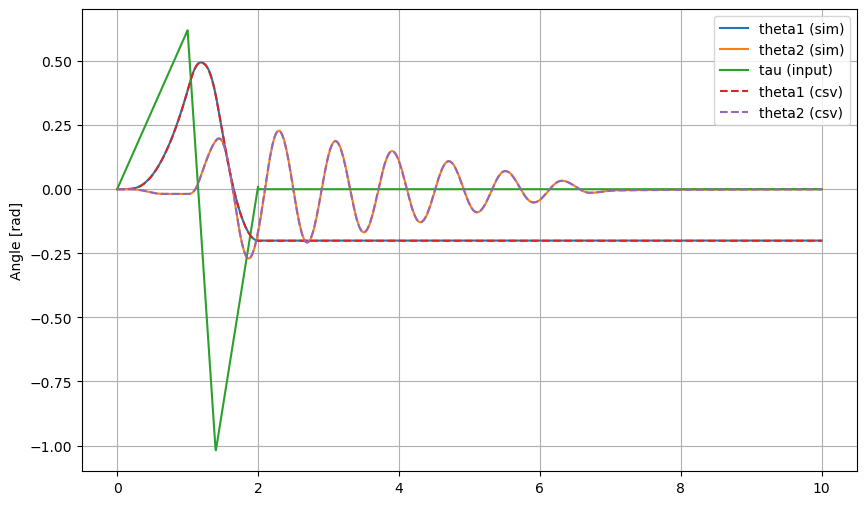

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

# ==========================================================
# Parameter (flach, ohne Klassen)
# ==========================================================
g = 9.81

# Geometrie
L1 = 0.155
L2 = 0.240
lP = 0.1917

# Massen
mS = 0.0274
mP = 0# 0.0510          # <- 0.0 wenn keine Zusatzmasse montiert ist
m2 = mS + mP

# Trägheitsmomente
J1_hat = 2.89e-2
J0_hat = J1_hat + m2 * L1**2

l2 = L2 / 2.0
J2_hat = (1/12) * mS * L2**2 + mS * l2**2 + mP * lP**2

# Reibungsparameter
mu_V1 = 50.91e-2
mu_H1 = 93.58e-3
mu_V2 = 1.332e-5
mu_H2 = 3.018e-4

epsilon = 0.01
tau_max = 4.0


# ==========================================================
# Eingangsfunktion aus 3.4 (HIER 1:1 einsetzen)
# ==========================================================
def input_tau(t: float) -> float:
    # TODO: exakt eure 3.4-Funktion hier einsetzen (dein bisheriger Block ist nur Platzhalter)
    if 0 < t < 1.0:
        tau = 0.62*t
    elif 1 <= t <= 1.4:
        tau = -4.12*t+4.74
    elif 1.4 < t < 2:
        tau = 1.72*t-3.43
    else:
        tau = 0.0

    return float(np.clip(tau, -tau_max, tau_max))


# ==========================================================
# Reibung: mu_V*v + mu_H*sgn(v) ~ mu_V*v + mu_H*tanh(v/epsilon)
# ==========================================================
def friction(v: float, mu_V: float, mu_H: float) -> float:
    return mu_V * v + mu_H * np.tanh(v / epsilon)


# ==========================================================
# Zustandsraummodell
# x = [theta1, theta1_dot, theta2, theta2_dot]
# ==========================================================
def furuta_dynamics(t, x):
    theta1, theta1_dot, theta2, theta2_dot = x
    tau = input_tau(t)

    # Reibmomente
    b1 = friction(theta1_dot, mu_V1, mu_H1)
    b2 = friction(theta2_dot, mu_V2, mu_H2)

    # Massenmatrix M(theta2)
    M11 = J0_hat + J2_hat * np.sin(theta2)**2
    M12 = m2 * L1 * l2 * np.cos(theta2)
    M = np.array([[M11, M12],
                  [M12, J2_hat]], dtype=float)

    # Rechte Seite r(x,u) (aus (2a),(2b))
    r1 = (
        tau
        + m2 * L1 * l2 * np.sin(theta2) * theta2_dot**2
        - J2_hat * np.sin(2 * theta2) * theta1_dot * theta2_dot
        - b1
    )

    r2 = (
        0.5 * J2_hat * np.sin(2 * theta2) * theta1_dot**2
        - m2 * g * l2 * np.sin(theta2)
        - b2
    )

    theta1_ddot, theta2_ddot = np.linalg.solve(M, np.array([r1, r2], dtype=float))

    return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]


# ==========================================================
# Simulation
# ==========================================================
t_span = (0.0, 10.0)
x0 = [0.0, 0.0, 0.0, 0.0]  # <- muss zu validationSimulation.csv passen!

sol = solve_ivp(
    furuta_dynamics,
    t_span,
    x0,
    rtol=1e-6,
    atol=1e-9,
    max_step=1e-2
)


# ==========================================================
# Plot + CSV Vergleich
# ==========================================================
df = pd.read_csv("validationSimulation.csv")
t_csv = df["time"].values
theta1_csv = df["F: theta1"].values
theta2_csv = df["F: theta2"].values

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label="theta1 (sim)")
plt.plot(sol.t, sol.y[2], label="theta2 (sim)")
plt.plot(sol.t, [input_tau(t) for t in sol.t], label="tau (input)")
plt.plot(t_csv, theta1_csv, "--", label="theta1 (csv)")
plt.plot(t_csv, theta2_csv, "--", label="theta2 (csv)")
plt.ylabel("Angle [rad]")
plt.legend()
plt.grid(True)
plt.show()


## Parameterbestimmung

Die zu bestimmenden Parameter sind:  
$\micro_{V,2} = \alpha \rightarrow viskose Reibung $  
$\micro_{H,2} = \beta \rightarrow Haftreibung $  
$\micro_{L,p} = \gamma \rightarrow Position Pendelmasse $  



$\hat J_2\,\ddot{\theta}_2(t)\;+\;m_2 g l_2\,\sin\!\big(\theta_2(t)\big)\;+\;\mu_{V,2}\,\dot{\theta}_2(t)\;+\;\mu_{H,2}\,\operatorname{sgn}\!\big(\dot{\theta}_2(t)\big)\;=\;0$

Mit 
$\dot{\theta}_{2,k}\;\approx\;\frac{\theta_{2,k+1}-\theta_{2,k}}{\Delta t},
\qquad
\ddot{\theta}_{2,k}\;\approx\;\frac{\theta_{2,k+2}-2\theta_{2,k+1}+\theta_{2,k}}{\Delta t^{2}}
$


folgt: 
$\hat J_2\,\frac{\theta_{2,k+2}-2\theta_{2,k+1}+\theta_{2,k}}{\Delta t^{2}}
\;+\;m_2 g l_2\,\sin(\theta_{2,k})
\;+\;\mu_{V,2}\,\frac{\theta_{2,k+1}-\theta_{2,k}}{\Delta t}
\;+\;\mu_{H,2}\,\operatorname{sgn}\!\left(\frac{\theta_{2,k+1}-\theta_{2,k}}{\Delta t}\right)
\;=\;0
$

$
-\hat J_2\,\ddot{\theta}_{2,k}\;-\;g\,m_S\frac{L_2}{2}\,\sin(\theta_{2,k})
\;=\;
\mu_{V,2}\,\dot{\theta}_{2,k}
\;+\;
\mu_{H,2}\,\operatorname{sgn}(\dot{\theta}_{2,k})
\;+\;
\big(g\,m_P\,\sin(\theta_{2,k})\big)\,l_P .
$

$p=\begin{bmatrix}\mu_{V,2}\\ \mu_{H,2}\\ l_P\end{bmatrix},
\qquad
A_k=\begin{bmatrix}
\dot{\theta}_{2,k} & \operatorname{sgn}(\dot{\theta}_{2,k}) & g\,m_P\,\sin(\theta_{2,k})
\end{bmatrix},
\qquad
y_k=-\hat J_2\,\ddot{\theta}_{2,k}-g\,m_S\frac{L_2}{2}\,\sin(\theta_{2,k}).
$

$A=\begin{bmatrix}A_0\\A_1\\ \vdots\\ A_{N-2}\end{bmatrix},
\qquad
y=\begin{bmatrix}y_0\\y_1\\ \vdots\\ y_{N-2}\end{bmatrix},
\qquad
A\,p=y.
$



In [4]:
#------------- Aufgabe 3.5 und 3.6 -----------

import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d # wird für Teil 3.5 benötigt
from scipy.optimize import curve_fit # wird für Teil 3.7 benötigt
from scipy.optimize import least_squares #Teilaufgabe 3.7
from scipy.optimize import minimize 
# Modi
Ohne_mp = 0

# Parameter
g = 9.81  # Erdbeschleunigung [m/s^2]
ms = 0.0274 # Stabmasse auch m2
mp = 0.051 # Pendelmasse zusatzt Gewicht
L1 = 0.155  # Länge des Rotorarms [m]
L2 = 0.24  # Länge des Pendelarms [m]
l1 = L1/2  # Länge der Massenposition des Rotorarms
lp = 0.1917 # Position Pendelmasse [m] 
J1_hat = 0.0289  # Trägheitsmoment Rotorarm [kg·m^2]

# Berechnete Parameter

if(Ohne_mp):
    m2 = ms
    l2 = L2/2 
else:
    m2 = ms + mp # Masse des Pendelarms
    l2 = (ms * L2/2 + mp * lp)/(m2) # Länge der Massenposition des Pendelarms mit Pendelmasse mp bei lp
    print("mp")


# Reibungsparameter
muH1 = 0.09358 # Haftreibung Rotor
muH2 = 3.018e-4 # Haftreibung Pendel
muV1 = 0.5091  # Viskose Reibung Rotorarm [N·m·s]
muV2 = 1.332e-5  # Viskose Reibung Pendelarm [N·m·s]
epsilon = 0.01  # Glattheitsparameter für Reibungsapproximation


#---------------Trägheitsmomente------------------
# Gesamt Trägheitsmoment J0_hat (in Ruhelage)
J0_hat = J1_hat + m2*L1**2

if(Ohne_mp):
    J2_hat = 1/3 * ms * L2**2
else:
    J2_hat = 1/3 * ms * L2**2 + mp * lp**2


# Berechnung des Trägheitsmoment J2 (Trägheitsmoment des Pendelarms ohne Zusatzmasse)
# J2_ohneSteiner = 1/12*ms*L2**2
J2_Steiner = ms*(L2/2)**2
# Wenn eine Pendelmasse vorhanden dann wird das Trägheitsmoment um einen weiter Term erweitert
# Pendelmasse vereinfacht Punktmasse deshalb kein Trägheitsmoment sonder nur Steineranteil
Jp_Steiner = mp*lp**2
# Gesamtes Flächenträgheitsmoment der Pendelarms J2_hat
#J2_hat = J2_ohneSteiner + J2_Steiner + Jp_Steiner
J2_hat = 1/3 * ms * L2**2 + mp * lp**2

# ----------------- Aufgabe 3_5 -----------------
# Datei einlesen & Mess-Daten auslesen 
data = pd.read_csv("messungIdentPendulum.csv")

teval = data['time']
theta2eval = data['F: theta2']
dtheta2eval = data['F: theta2dot']

# Nur Werte ab der 5. Sekunde verwenden und Ende wegschneiden 
mask = (teval >= 5) & (teval <= 35)
teval = teval[mask]
theta2eval = theta2eval[mask]
dtheta2eval = dtheta2eval[mask]

# Parameteridentifikation: Modellfunktion
# Dynamisches Modell (ODE)

def nonlinear_dynamics(t, y, lp, muH2, muV2): #params):
    #mu_v2, mu_h2, lp = params
    # hier werden die Trägheitsmomente mit der Zusatzmasse noch einmal aufgestellt
    m2gesamt = ms + mp
    l2gesamt = (l2*ms + lp*mp)/m2gesamt
    #J2 = J2_ohneSteiner + J2_Steiner + Jp_Steiner 
    J2 = (1 / 3) * ms * L2**2 + mp * lp**2

    theta2, dtheta2 = y

    ddtheta2 = -friction_model(dtheta2, muH2, muV2, 0.01)/J2 - m2gesamt*l2gesamt*g*theta2/J2

    return [dtheta2, ddtheta2]

# Fehlerfunktion = Least Squares
#θ = params von Aθ=b
def error_function(params):
    lp, uh2, uv2 = params

    x0 = [theta2eval.iloc[0], dtheta2eval.iloc[0]] #Startwinkel der Messung

    sol = solve_ivp(
        nonlinear_dynamics,
        (float(teval.iloc[0]), float(teval.iloc[-1])),
        x0,
        args=(lp, uh2, uv2),
        t_eval=teval.to_numpy(),
        method="RK45",
    )

    x3_sim = sol.y[0]
    x4_sim = sol.y[1]
    
    #ε=^(T)e
    error_x3 = np.sum((x3_sim - theta2eval.values) ** 2)
    error_x4 = np.sum((x4_sim - dtheta2eval.values) ** 2) 


    return   error_x3 + error_x4



# Startwerte für die Optimierung
uv2 = 1.332e-5
uh2 = 3.018e-4 
lp = 0.19    
initial_guess = [lp, uh2, uv2]

# Optimierung durchführen
result = minimize(
    error_function,
    initial_guess,
    bounds=[(L2/2, L2), (1e-5, 1e-2), (1e-6, 1e-3)],  # Grenzen für lp, uh2, uv2
    method='Powell', #Powell, L-BFGS-B
)

lp_opt, muH2_opt, muV2_opt = result.x

print("Identifizierte Parameter:")
print(f"Viskose Reibung (muV2): {muV2_opt:.6e}")
print(f"Haftreibung (muH2): {muH2_opt:.6e}")
print(f"Position (lp): {lp_opt:.6f}")

# Startzustand: erstes Sample der (gefilterten) Messdaten
x0 = [theta2eval.iloc[0], dtheta2eval.iloc[0]]

# Zeitbereich der (gefilterten) Messdaten
t0 = float(teval.iloc[0])
tf = float(teval.iloc[-1])

# solve_ivp braucht t_eval als numpy array (geht auch als Series, aber sauberer so)
t_eval_np = teval.to_numpy()

sol = solve_ivp(
    nonlinear_dynamics,
    (t0, tf),
    x0,
    args=(lp_opt, muH2_opt, muV2_opt),
    t_eval=t_eval_np,
    method="RK45",
)

t_sim = sol.t
theta2_sim = sol.y[0]

# Plot (Messung vs Simulation im selben Zeitfenster)
plt.figure()
plt.plot(teval, np.rad2deg(theta2eval), label="Messdaten theta_2")
plt.plot(t_sim, np.rad2deg(theta2_sim), label="Simulation theta_2")
plt.legend()
plt.title("Vergleich: Messung vs Simulation")
plt.xlabel("Zeit [s]")
plt.ylabel("Winkel [°]")
plt.grid(True)
plt.show()


mp


NameError: name 'friction_model' is not defined